### Building Makemore: Data Acquisition and Exploration

In [1]:
# !wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-07-31 11:04:43--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: 'names.txt'

     0K .......... .......... .......... .......... .......... 22% 7.78M 0s
    50K .......... .......... .......... .......... .......... 44% 10.8M 0s
   100K .......... .......... .......... .......... .......... 67% 11.9M 0s
   150K .......... .......... .......... .......... .......... 89% 22.5M 0s
   200K .......... .......... ..                              100% 38.2M=0.02s

2023-07-31 11:04:43 (12.3 MB/s) - 'names.txt' saved [228145/228145]



In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
print("Total Names:", len(words))
print("Shortest Name Length:", min(len(w) for w in words))
print("Longest Name Length:", max(len(w) for w in words))

Total Names: 32033
Shortest Name Length: 2
Longest Name Length: 15


### Bigrams

In [11]:
def make_bigrams(n=len(words), verbose=False):
    b = {}
    for w in words[:n]:
        chs = ['<S>'] + list(w) + ['<E>']
        for ch1, ch2 in zip(chs, chs[1:]):
            bigram = (ch1, ch2)
            b[bigram] = b.get(bigram, 0) + 1
            if verbose:
                print(ch1, ch2)
        if verbose:
            print('-----------------------')
    return b

b = make_bigrams(3, True)

<S> e
e m
m m
m a
a <E>
-----------------------
<S> o
o l
l i
i v
v i
i a
a <E>
-----------------------
<S> a
a v
v a
a <E>
-----------------------


In [13]:
b = make_bigrams()
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [17]:
sorted(b.items(), key = lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

### We prefer to store out bigrams in a 2D array instead of a dictionary

We will use pytorch

In [18]:
import torch

In [24]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [25]:
a.dtype

torch.int32

In [49]:
# N = torch.zeros((28,28), dtype=torch.int32) # Bigram relationships held in torch tensor
N = torch.zeros((27,27), dtype=torch.int32) # Replace start and end tokens with single unified token

In [50]:
chars = sorted(list(set(''.join(words)))) # characters
# stoi = {s:i for i,s in enumerate(chars)} # character to integer mapping
stoi = {s:i+1 for i,s in enumerate(chars)} # start at 1
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [51]:
def make_bigrams(N, stoi):
    for w in words:
        # chs = ['<S>'] + list(w) + ['<E>']
        chs = ['.'] + list(w) + ['.'] # all dots
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            N[ix1, ix2] += 1

make_bigrams(N, stoi)

Visualize, Visualize, Visualize

In [52]:
import matplotlib.pyplot as plt 
%matplotlib inline
# plt.imshow(N); # Not good enough

In [53]:
# itos = {i:s for s,i in stoi.items()}

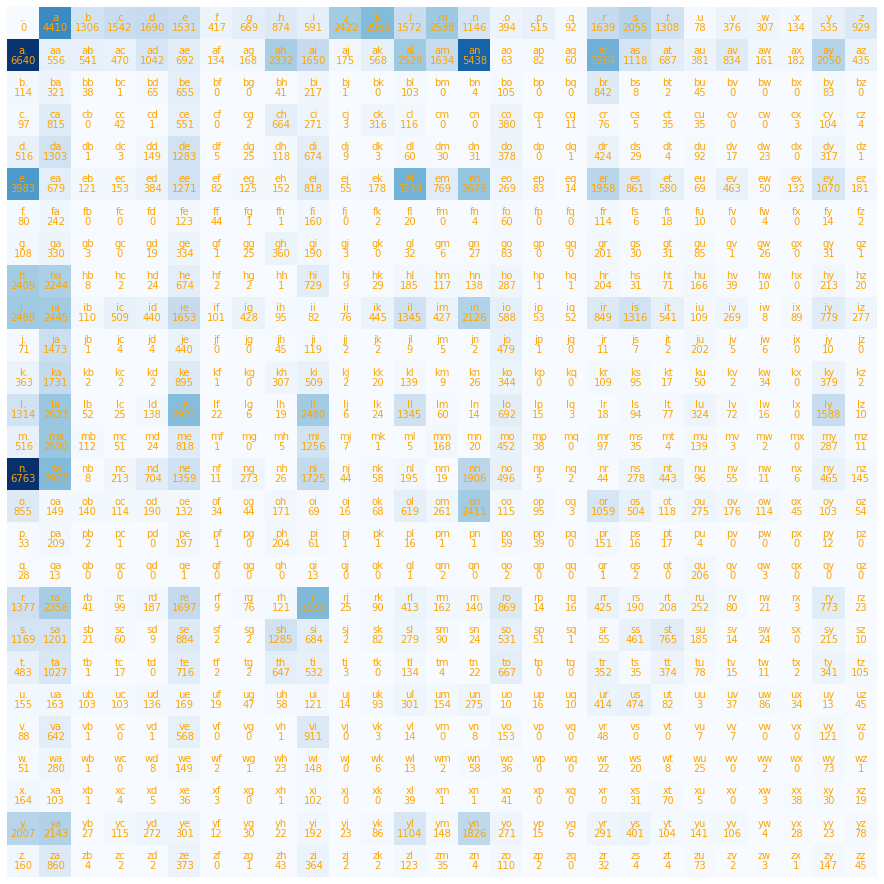

In [58]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr, ha='center', va='bottom', color='orange')
        plt.text(j,i, N[i,j].item(), ha='center', va='top', color='orange')
plt.axis('off');

### We have created a count distribution

Now we need to turn it into a probability distribution and sample

In [59]:
N[0] # Count for 0th element which is '.'

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [61]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

We're goin to do 2 things
1. Use a the torch multinomial feature to create a multinomial distribution we can sample from
2. Use a torch Generator so that I get the same results every time

In [68]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [74]:
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p / p.sum()

In [75]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # Corresponds to a sampled index based on the character bigram distribution
itos[ix]

'm'

### The Bigram model is kind of bad

In [107]:
P = (N+1).float() # Add model smoothing
P /= P.sum(1, keepdim=True) # operation is broadcastable, /= inplace operation!!!!
P[0].sum()

tensor(1.)

In [108]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


### Model Evaluation

**GOAL:** Maximize Likelihood of the data w.r.t. model parameters (statistical modeling)
* Equivalent to maximizing the log likelihood (because log is monotonic)
* Equivalent to minimizing the negative log likelihood
* Equivalent to minimizing the average negatvive log likelihood
* `log(a*b*c) = log(a) + log(b) + log(c)`


In [105]:
log_likelihood = 0.0
n = 0
for w in words:
    # chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.'] # all dots
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        prob = P[ix1, ix2] # Probability of the model selecting a bigram
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood # The higher this is, the worse the prediction
print(f'{nll=}')
print(f'norm nll: {nll/n}') # The lower this is the better

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
norm nll: 2.454094171524048


### A Neural Network Approach

In [111]:
# Create the training set of all the bigrams
xs, ys = [], []


for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] # all dots
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)       

. e
e m
m m
m a
a .


In [112]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [117]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float() # Cast to float. You don't want to feed ints into neural nets
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [118]:
xenc.shape

torch.Size([5, 27])

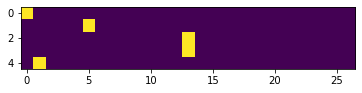

In [119]:
plt.imshow(xenc)

In [126]:
W = torch.randn((27, 1))
W

tensor([[ 0.2112],
        [ 0.7970],
        [ 0.7869],
        [-0.6956],
        [-1.0343],
        [-0.9442],
        [-1.9590],
        [ 0.4226],
        [-0.4204],
        [-0.5237],
        [-1.3441],
        [-0.7879],
        [ 0.2554],
        [ 0.0128],
        [-0.5081],
        [-0.0291],
        [ 1.3065],
        [-0.1919],
        [ 0.6192],
        [-0.5826],
        [ 0.6818],
        [-0.9325],
        [-1.3338],
        [-0.9757],
        [-1.7886],
        [ 0.0649],
        [-0.7306]])

In [127]:
xenc @ W # (5, 27) @ (27, 1) -> (5, 1)

tensor([[ 0.2112],
        [-0.9442],
        [ 0.0128],
        [ 0.0128],
        [ 0.7970]])

In [128]:
W = torch.randn((27, 27))
xenc @ W # (5, 27) @ (27, 27) -> (5, 27)

tensor([[-0.3342, -0.8716, -0.4477,  0.4450,  0.2853,  1.3286, -1.6915,  2.9132,
         -0.1209,  0.2302, -1.9798,  0.2962,  0.6130,  0.5993,  0.5152,  1.7013,
         -0.0238, -0.2403,  2.1765, -0.4245, -0.2979,  0.0482,  1.3043, -0.1407,
          2.2684,  1.3771, -0.2065],
        [ 1.0007,  1.1780,  1.7540, -0.9115,  0.6539,  0.7414, -0.0168,  0.1647,
          1.0347, -0.3821, -0.7753,  0.3315, -0.9595, -0.7218, -0.2072, -0.0295,
          0.8454,  0.3796, -0.4157, -1.2497, -1.5908,  0.0260, -0.8457,  0.4792,
         -1.0926,  0.1783, -1.6543],
        [-0.1588,  1.5655,  0.2637, -0.9160,  1.4826,  0.8791,  1.2656, -1.6395,
         -0.1479,  0.8877, -1.9098, -1.3859, -0.0257, -0.2904, -1.6226,  0.2677,
          0.2172, -1.1206, -1.4236, -0.5747, -1.0064,  0.2965, -1.1125, -0.4750,
         -0.8613, -0.0239,  0.4831],
        [-0.1588,  1.5655,  0.2637, -0.9160,  1.4826,  0.8791,  1.2656, -1.6395,
         -0.1479,  0.8877, -1.9098, -1.3859, -0.0257, -0.2904, -1.6226,  0.2677

In [129]:
(xenc @ W)[3, 13]

tensor(-0.2904)

In [130]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [131]:
W[:, 13]

tensor([ 0.5993, -0.8600, -0.0413, -1.7180,  1.7427, -0.7218, -0.8443,  1.5472,
        -0.5869, -0.3240, -0.0465,  0.1758,  1.7318, -0.2904, -0.4056, -0.1158,
        -0.4319,  1.6472, -1.1687,  0.2950,  0.8626,  0.5367,  0.9189,  1.7457,
        -0.2320,  0.4937, -0.4315])

In [133]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N sort of
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0097, 0.0057, 0.0087, 0.0212, 0.0181, 0.0514, 0.0025, 0.2505, 0.0121,
         0.0171, 0.0019, 0.0183, 0.0251, 0.0248, 0.0228, 0.0746, 0.0133, 0.0107,
         0.1199, 0.0089, 0.0101, 0.0143, 0.0501, 0.0118, 0.1315, 0.0539, 0.0111],
        [0.0754, 0.0900, 0.1602, 0.0111, 0.0533, 0.0582, 0.0273, 0.0327, 0.0780,
         0.0189, 0.0128, 0.0386, 0.0106, 0.0135, 0.0225, 0.0269, 0.0646, 0.0405,
         0.0183, 0.0079, 0.0056, 0.0285, 0.0119, 0.0448, 0.0093, 0.0331, 0.0053],
        [0.0260, 0.1456, 0.0396, 0.0122, 0.1340, 0.0733, 0.1079, 0.0059, 0.0262,
         0.0739, 0.0045, 0.0076, 0.0297, 0.0228, 0.0060, 0.0398, 0.0378, 0.0099,
         0.0073, 0.0171, 0.0111, 0.0409, 0.0100, 0.0189, 0.0129, 0.0297, 0.0493],
        [0.0260, 0.1456, 0.0396, 0.0122, 0.1340, 0.0733, 0.1079, 0.0059, 0.0262,
         0.0739, 0.0045, 0.0076, 0.0297, 0.0228, 0.0060, 0.0398, 0.0378, 0.0099,
         0.0073, 0.0171, 0.0111, 0.0409, 0.0100, 0.0189, 0.0129, 0.0297, 0.0493],
        [0.0253, 0.0446,

In [134]:
probs[0]

tensor([0.0097, 0.0057, 0.0087, 0.0212, 0.0181, 0.0514, 0.0025, 0.2505, 0.0121,
        0.0171, 0.0019, 0.0183, 0.0251, 0.0248, 0.0228, 0.0746, 0.0133, 0.0107,
        0.1199, 0.0089, 0.0101, 0.0143, 0.0501, 0.0118, 0.1315, 0.0539, 0.0111])

### Finalized Simple Bigram NN Step By Step

In [150]:
xs

tensor([ 0,  5, 13, 13,  1])

In [151]:
ys

tensor([ 5, 13, 13,  1,  0])

In [152]:
# randomly initialize 27 nerons' weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27,27), generator=g)

In [153]:
xenc = F.one_hot(xs, num_classes=27).float() # Input to network, one hot encoding
logits = xenc @ W # Predict log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True) # Probabilities of the next character, also known as the softmax with line 2

In [154]:
probs.shape

torch.Size([5, 27])

In [155]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input char index
    y = ys[i].item() # target char index
    print('------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to neural net:', x)
    print('NN output probabilities', probs[i])
    print('label (actual next char):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct answer:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('============')
print('Average NLL, i.e. loss:', nlls.mean().item())

------------
bigram example 1: .e (indexes 0, 5)
input to neural net: 0
NN output probabilities tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next char): 5
probability assigned by the net to the correct answer: 0.05734505504369736
log likelihood: -2.858668565750122
negative log likelihood: 2.858668565750122
------------
bigram example 2: em (indexes 5, 13)
input to neural net: 5
NN output probabilities tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next char): 13
probability assigned by the net to the correct answer: 0.01458862517029047
log likelihood: -4.227513313293457
negat

### Opimization

In [156]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [163]:
# Random initialization of weight
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [164]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [165]:
loss = -probs[torch.arange(len(ys)), ys].log().mean() # Vectorized
loss

tensor(3.7693)

In [178]:
# Forward Pass
xenc = F.one_hot(xs, num_classes=27).float() # Input to network, one hot encoding
logits = xenc @ W # Predict log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True) # Probabilities of the next character, also known as the softmax with line 2
loss = -probs[torch.arange(len(ys)), ys].log().mean() # Vectorized

In [179]:
# backward pass
W.grad = None # set to zero grad
loss.backward()

In [180]:
W.shape, W.grad.shape

(torch.Size([27, 27]), torch.Size([27, 27]))

In [181]:
print(loss.item())

3.7291626930236816


In [182]:
W.grad

tensor([[ 0.0122,  0.0020,  0.0025,  0.0008,  0.0034, -0.1974,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0473,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0291],
        [-0.1969,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0216,  0.0026,
          0.0025,  0.0010,  0.0204,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [183]:
W.data += -0.1 * W.grad

### Everything put together

In [189]:
# Create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.'] # all dots
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initizalize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples: 228146


In [192]:
# Gradient Descent

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # Input to network, one hot encoding
    logits = xenc @ W # Predict log-counts
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True) # Probabilities of the next character, also known as the softmax with line 2
    loss = -probs[torch.arange(len(ys)), ys].log().mean() # Vectorized
    print(loss.item())

    # Backward pass
    W.grad = None
    loss.backward()

    # Update
    W.data += -50 * W.grad

2.4607715606689453
2.460740089416504
2.4607090950012207
2.4606781005859375
2.4606473445892334
2.4606173038482666
2.4605870246887207
2.460556983947754
2.4605274200439453
2.460498094558716
2.4604690074920654
2.460440158843994
2.460411548614502
2.460383415222168
2.460355043411255
2.4603271484375
2.460299491882324
2.4602720737457275
2.460244655609131
2.4602179527282715
2.460191011428833
2.460164785385132
2.4601380825042725
2.4601120948791504
2.4600863456726074
2.4600603580474854
2.4600348472595215
2.460009813308716
2.459984540939331
2.4599595069885254
2.459934949874878
2.4599101543426514
2.459885835647583
2.4598617553710938
2.4598376750946045
2.4598140716552734
2.4597904682159424
2.4597673416137695
2.4597437381744385
2.4597208499908447
2.459697961807251
2.4596753120422363
2.4596524238586426
2.459630012512207
2.4596080780029297
2.4595859050750732
2.459564208984375
2.4595422744750977
2.4595208168029785
2.4594995975494385
2.4594781398773193
2.4594569206237793
2.4594361782073975
2.459415197372